In [182]:
#Importing the libraries

import pandas as pd
import numpy as np
import sklearn as sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [118]:
data = pd.read_csv('marketing_customer_analysis.csv', sep=",") #reading the data
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [119]:
data.shape #get the number of rows and columns

(9134, 24)

In [120]:
data.info() #get information of the column type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [121]:
data.dtypes #get the type of the columns

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [122]:
data.describe() #get statistical info of the numerical columns

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


**Cleaning**

In [123]:
ordered_columns = sorted(data.columns, reverse=False) #ordering the columns
ordered_columns

['Coverage',
 'Customer',
 'Customer Lifetime Value',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy',
 'Policy Type',
 'Renew Offer Type',
 'Response',
 'Sales Channel',
 'State',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [124]:
# order the columns of data in this order
data = data[ordered_columns]
data.head()

,Coverage,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Total Claim Amount,Vehicle Class,Vehicle Size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


In [125]:
data.columns = [data.columns[i].lower().replace(' ','_') for i in range(len(data.columns))] #standardizing the data columns
data.columns

Index(['coverage', 'customer', 'customer_lifetime_value', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy',
       'policy_type', 'renew_offer_type', 'response', 'sales_channel', 'state',
       'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [126]:
data.head()

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


**Outliers**

In [127]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:xlabel='customer_lifetime_value'>

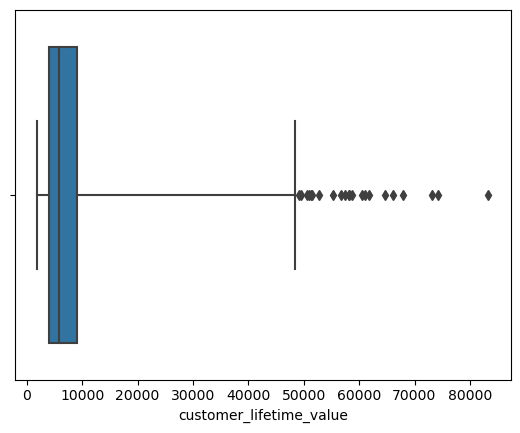

In [128]:
sns.boxplot(x=data['customer_lifetime_value'],whis=8) #check the outliers

**Comment:** I chose "customer_lifetime_value" column for removing the outliers as it has a high number of variables

In [129]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25) # measuring the iqr of the column
iqr 

4967.915247000001

In [130]:
# define the limits
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 8*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 8*iqr
upper_limit, lower_limit

(48705.48901725001, -35749.07018175001)

In [131]:
data.shape

(9134, 24)

In [132]:
len(data[(data['customer_lifetime_value']<lower_limit) & (data['customer_lifetime_value']>upper_limit)]) #number of rows of outliers

0

In [133]:
data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)] #removing outliers from the data
data

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,23405.987980,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal L1,Personal Auto,Offer2,No,Web,California,198.234764,Four-Door Car,Medsize
9130,Extended,PK87824,3096.511217,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,379.200000,Four-Door Car,Medsize
9131,Extended,TD14365,8163.890428,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate L2,Corporate Auto,Offer1,No,Branch,California,790.784983,Four-Door Car,Medsize
9132,Extended,UP19263,7524.442436,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal L2,Personal Auto,Offer3,No,Branch,California,691.200000,Four-Door Car,Large


# Processing Data

**X-Y Split**

In [134]:
y = ['total_claim_amount'] #splitting the target and other columns
X = data.drop(['total_claim_amount'], axis=1)
X.head()

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize


In [135]:
numerical = X.select_dtypes(include = np.number)#splitting categorical and numerical columns
categoricals = X.select_dtypes(include = np.object)
categoricals

,coverage,customer,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,BU79786,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,Bachelor,2/10/11,Employed,M,Urban,Married,Personal L1,Personal Auto,Offer2,No,Web,California,Four-Door Car,Medsize
9130,Extended,PK87824,College,2/12/11,Employed,F,Suburban,Divorced,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,Four-Door Car,Medsize
9131,Extended,TD14365,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate L2,Corporate Auto,Offer1,No,Branch,California,Four-Door Car,Medsize
9132,Extended,UP19263,College,2/3/11,Employed,M,Suburban,Married,Personal L2,Personal Auto,Offer3,No,Branch,California,Four-Door Car,Large


In [136]:
data['coverage'].unique() #Checking the values of each categorical columns to see which ones can be used for encoding

array(['Basic', 'Extended', 'Premium'], dtype=object)

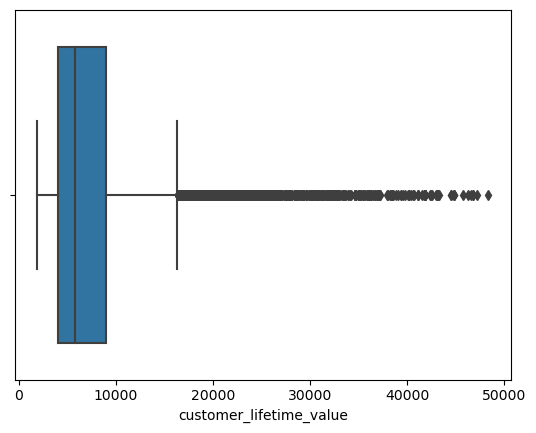

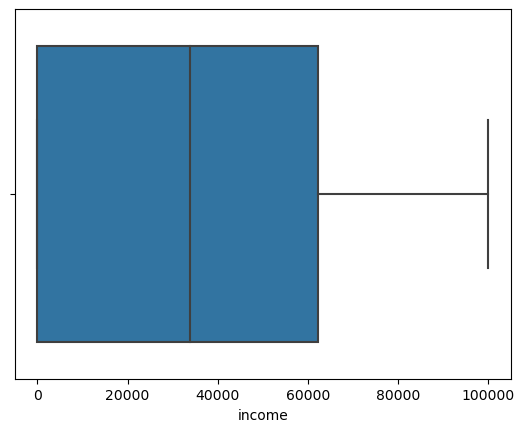

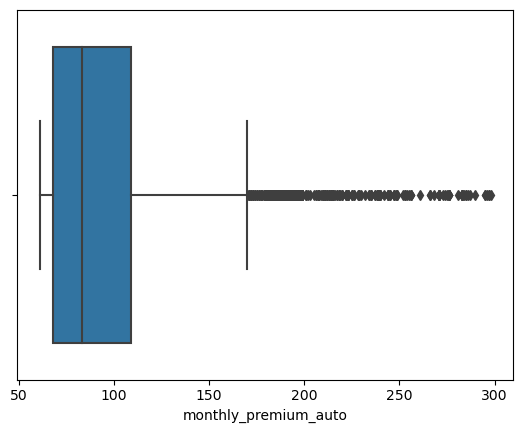

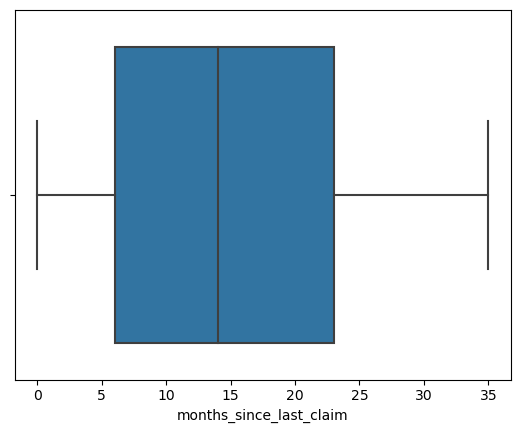

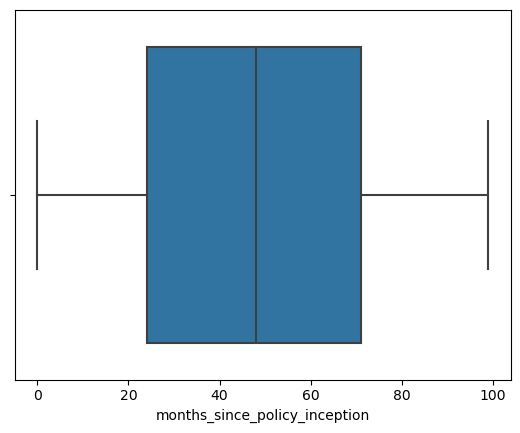

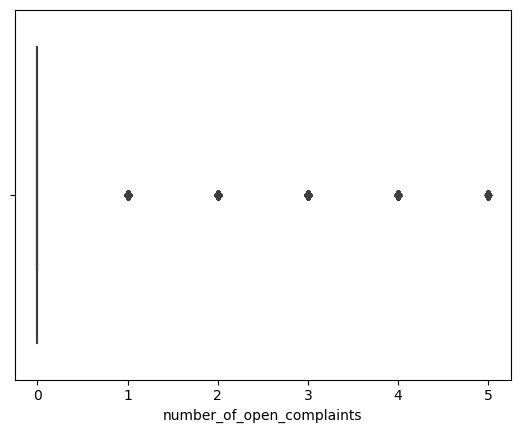

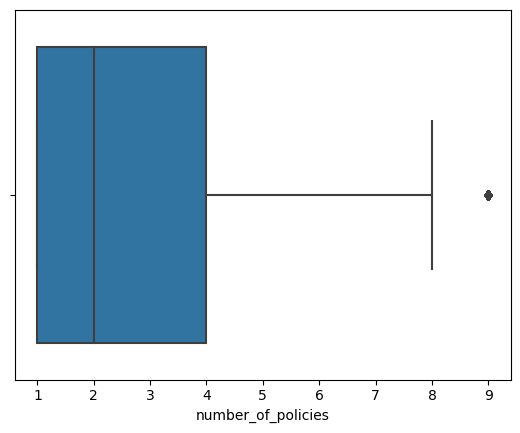

In [137]:
for column in numerical.columns: #check the boxplots for all the columns to see which columns have more outliers
    sns.boxplot(x=numerical[column] ,whis=1.5)
    plt.show()

# Normalize (numerical)

In [138]:
transformer = MinMaxScaler().fit(numerical) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(numerical) #This is a an array of arrays
print(x_minmax.shape)

(9112, 7)


In [139]:
X_num_norm = pd.DataFrame(x_minmax,columns=numerical.columns) #putting arrays in the format of dataframe
X_num_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.018630,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.109377,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.236540,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.123719,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.019710,0.438443,0.050633,0.342857,0.444444,0.0,0.000


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

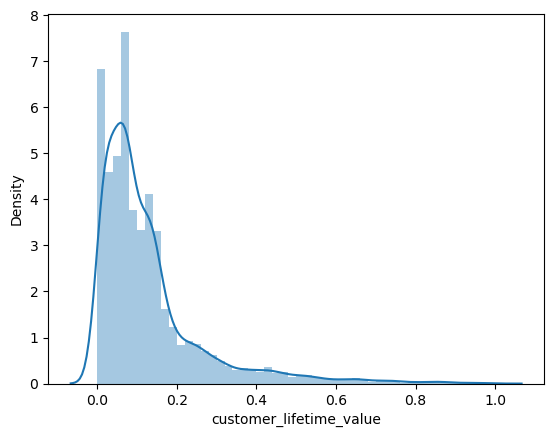

In [140]:
sns.distplot(X_num_norm['customer_lifetime_value']) #plotting the normalized data

# One Hot/Label Encoding (categorical)

In [141]:
categoricals.head()

,coverage,customer,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,BU79786,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize


In [142]:
categoricals = categoricals.drop(['customer','effective_to_date'], axis = 1) #removing the columns that won't affect our dataframe
categoricals

,coverage,education,employmentstatus,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Personal Auto,Offer2,No,Web,California,Four-Door Car,Medsize
9130,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,Four-Door Car,Medsize
9131,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Corporate Auto,Offer1,No,Branch,California,Four-Door Car,Medsize
9132,Extended,College,Employed,M,Suburban,Married,Personal L2,Personal Auto,Offer3,No,Branch,California,Four-Door Car,Large


In [143]:
data['vehicle_size'].unique() #Checking the values of each categorical columns to see which ones can be used for encoding

array(['Medsize', 'Small', 'Large'], dtype=object)

*comment:* Columns that don't have many values and are important can be used for encoding. Label/One-Hot/Nominal encodings have been used depending on the data and their application.

# One-Hot encoding

In [144]:
#one Hot encoding using 4 different columns

enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['marital_status','gender','policy_type','response']
encoded_array = enc.fit_transform(categoricals.loc[:,columns_to_one_hot])
categoricals_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
categoricals_sklearn_encoded = pd.concat([categoricals,categoricals_encoded],axis=1)
categoricals_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
categoricals_sklearn_encoded

,coverage,education,employmentstatus,location_code,policy,renew_offer_type,sales_channel,state,vehicle_class,vehicle_size,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes
0,Basic,Bachelor,Employed,Suburban,Corporate L3,Offer1,Agent,Washington,Two-Door Car,Medsize,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Extended,Bachelor,Unemployed,Suburban,Personal L3,Offer3,Agent,Arizona,Four-Door Car,Medsize,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Premium,Bachelor,Employed,Suburban,Personal L3,Offer1,Agent,Nevada,Two-Door Car,Medsize,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Basic,Bachelor,Unemployed,Suburban,Corporate L2,Offer1,Call Center,California,SUV,Medsize,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Basic,Bachelor,Employed,Rural,Personal L1,Offer1,Agent,Washington,Four-Door Car,Medsize,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


*Comment:* For colmuns that only have two values (like "response") or don't have any special order or size, one hot coding can be used. 

# label encoding

In [145]:
#label encoding

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'renew_offer_type'.
categoricals['renew_offer_type']= label_encoder.fit_transform(categoricals['renew_offer_type'])
  
categoricals['renew_offer_type'].unique()

array([0, 2, 1, 3])

*Comment: *'renew_offer_type' was chosen for label_encoding as its values could be classified by their label and they don't have any order or size.

# Ordinal encoding

In [146]:
data['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [147]:
#ordinal encoding (method 1 without using OrdinalEncoder)
scale_mapper = {'Small':1, 'Medsize':2, 'Large':3}
categoricals['vehicle_size'] = categoricals['vehicle_size'].replace(scale_mapper) 
categoricals['vehicle_size']

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    2
9131    2
9132    3
9133    2
Name: vehicle_size, Length: 9112, dtype: int64

In [148]:
#ordinal encoding (method 2)

#from sklearn.preprocessing import OrdinalEncoder
#VehicleSize_column = categoricals[["Vehicle Size"]]

#encoder = OrdinalEncoder()
#VehicleSize_encoded = encoder.fit_transform(VehicleSize_column)
#VehicleSize_encoded

# Concat DataFrames

In [149]:
# concatinating the numerical and encoded categorical columns
numerical = X.select_dtypes(include = np.number)
X = pd.concat([numerical, categoricals['renew_offer_type'] , categoricals['vehicle_size'], categoricals_encoded], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,vehicle_size,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Linear Regression

# Train-test split

In [184]:
#Linear Regression
# Train-test split
X = np.zeros((5000, 49152)) #making X and y the same size!
y = np.zeros((5000, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

# Apply linear regression

In [203]:
model = LinearRegression()
model.fit(X_train,y_train)
X_train.shape

(3500, 49152)

# Model Validation

In [204]:
predictions  = model.predict(X_test)
predictions.shape

(1500, 1)

In [205]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# Description

In [206]:
#Model Validation
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  1.0
RMSE =  0.0
MSE =  0.0


**Sorry Laz, But I will also upload the google colab file for this lab as I was getting error in train-test split because my X and y didn't have the same size. I tried many ways to resize them and I didn't have any prediction. But in google colab, everything worked just fine. That's why I also attached it. Hope you don't get angry! Thank youuuuuu**